# Importing Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("final_data.csv")
data = data.drop(columns=["Unnamed: 0", "Sl. No","Patient File No."])
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [4]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [51]:
data["PCOS (Y/N)"].value_counts()

0    353
1    173
Name: PCOS (Y/N), dtype: int64

# Data Cleaning and EDA

In [5]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

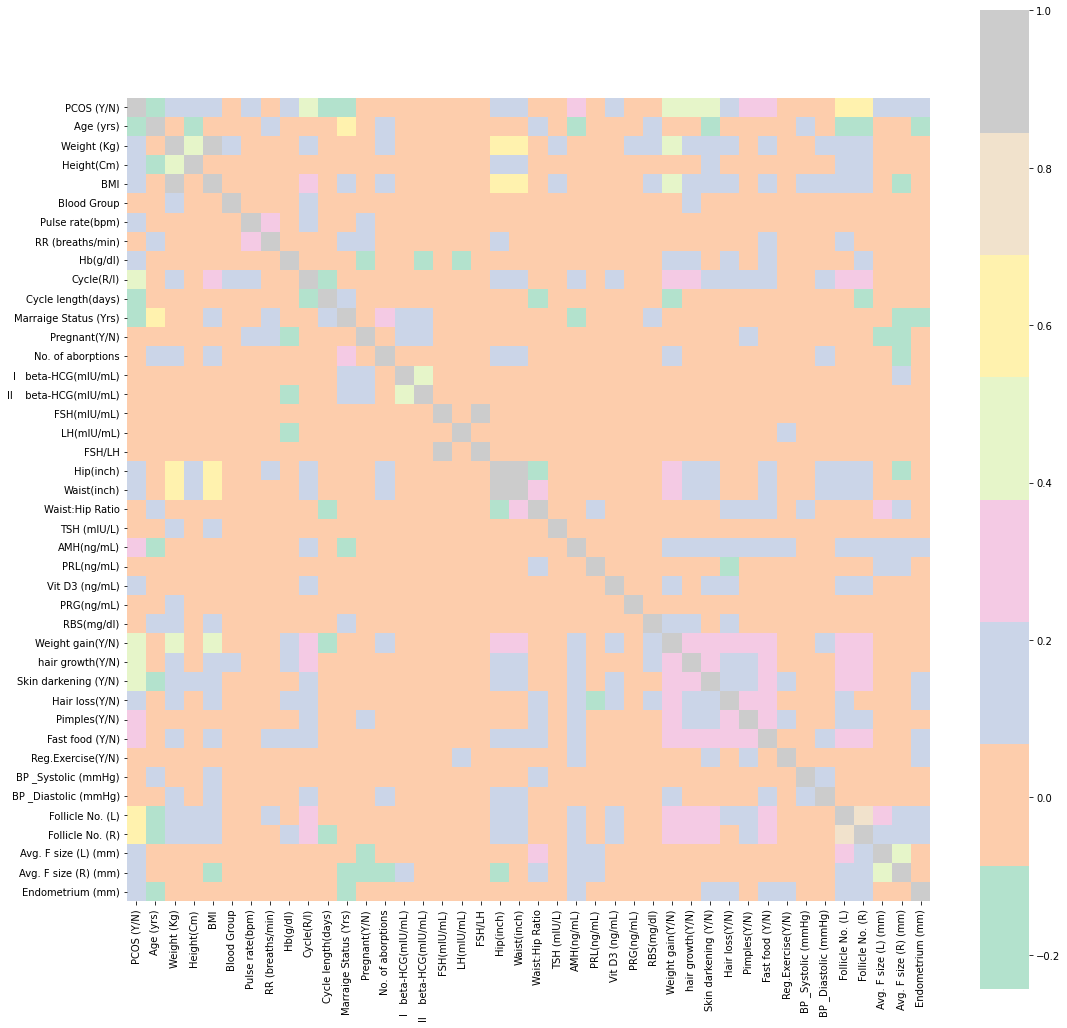

In [6]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel2", square=True);

In [7]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

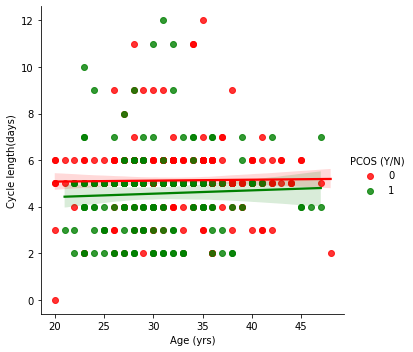

In [8]:
# Length of menstrual phase in PCOS vs normal 
color = ["red", "green"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

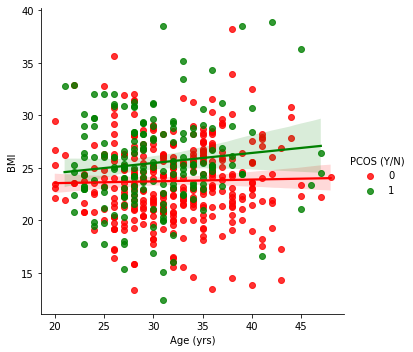

In [9]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

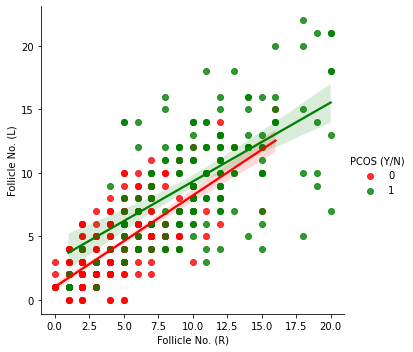

In [10]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


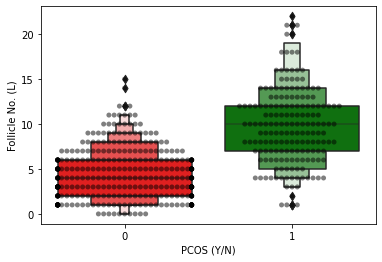

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


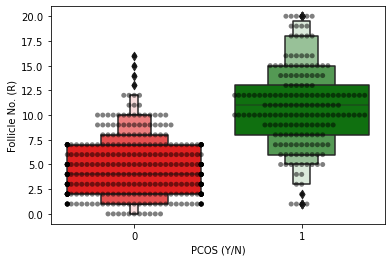

In [11]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

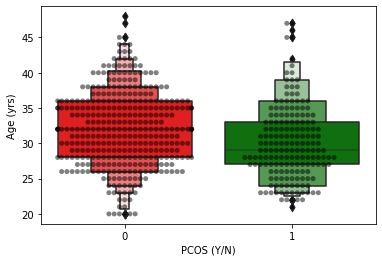

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


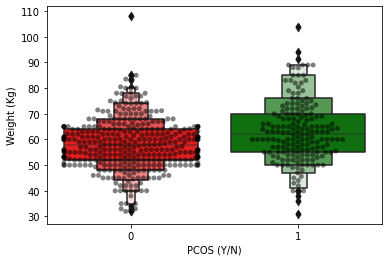

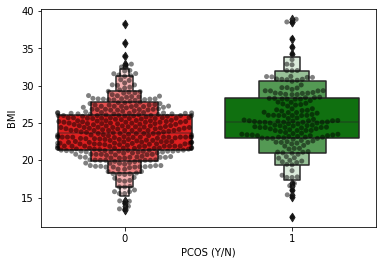

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


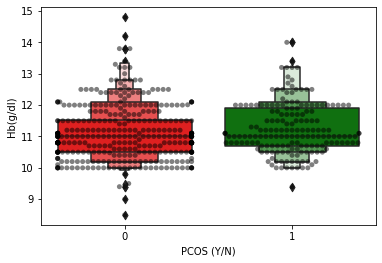

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


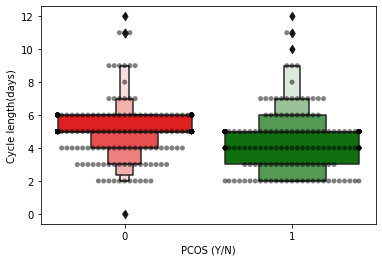

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


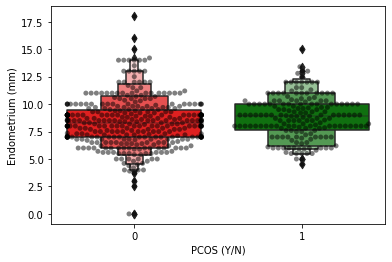

In [12]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

In [13]:
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(526, 42)

In [14]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
y = data['PCOS (Y/N)']
X = data.drop('PCOS (Y/N)', axis = 1)

X_new = SelectKBest(chi2, k=15).fit_transform(X, y)
X_new[:5]



array([[ 44.6       ,   2.        ,   7.        ,   1.99      ,
          1.99      ,   2.16032609,   2.07      ,  17.1       ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   3.        ,   3.        ],
       [ 65.        ,   2.        ,  11.        ,  60.8       ,
          1.99      ,   6.17431193,   1.53      ,  61.3       ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   3.        ,   5.        ],
       [ 68.8       ,   2.        ,  10.        , 494.08      ,
        494.08      ,   6.29545455,   6.63      ,  49.7       ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,  13.        ,  15.        ],
       [ 65.        ,   2.        ,   4.        ,   1.99      ,
          1.99      ,   3.41525424,   1.22      ,  33.4       ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   2.        ,   2.        ],
       [ 52.        ,   2.  

In [47]:
model= SelectKBest(chi2, k=20).fit(X,y)


selected_feature_names=X.columns[model.get_support()]
print(selected_feature_names)

Index(['Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'AMH(ng/mL)',
       'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)'],
      dtype='object')


## Modeling 

In [21]:
#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

#Testing the Model on test set

predictions=rfc.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)


classi_report = classification_report(y_test, predictions)
print(classi_report)

0.9113924050632911
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       108
           1       0.91      0.80      0.85        50

    accuracy                           0.91       158
   macro avg       0.91      0.88      0.89       158
weighted avg       0.91      0.91      0.91       158



C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


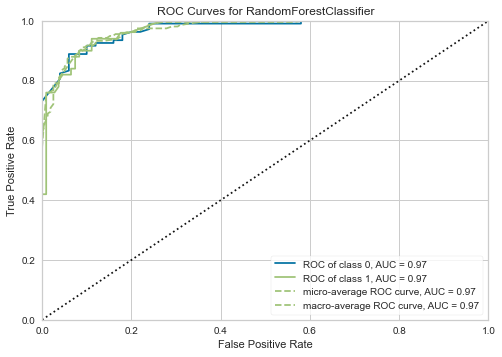

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rfc, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


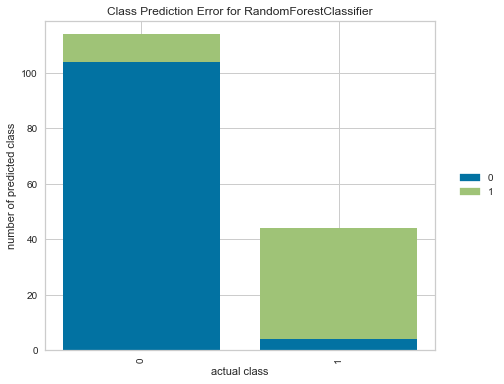

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [24]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    rfc, classes=[0,1]
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


#Making prediction and checking the test set

pred_rfc = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

#Testing the Model on test set

predictions=clf.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)


classi_report = classification_report(y_test, predictions)
print(classi_report)

0.879746835443038
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       108
           1       0.84      0.76      0.80        50

    accuracy                           0.88       158
   macro avg       0.87      0.85      0.86       158
weighted avg       0.88      0.88      0.88       158



C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


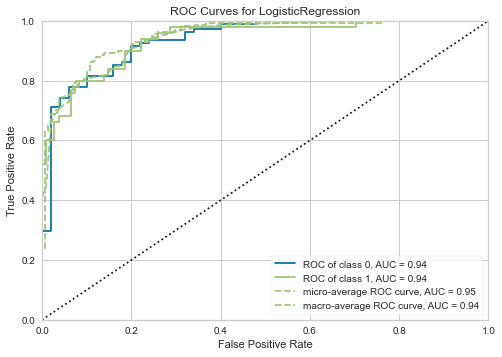

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
visualizer = ROCAUC(clf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


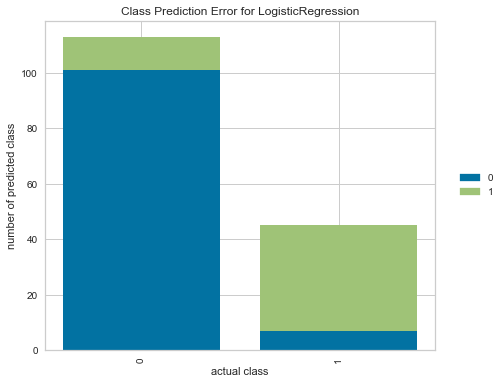

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [28]:
visualizer = ClassPredictionError(
    clf, classes=[0,1]
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### MLP Classifier(Neural Networks)

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

#Testing the Model on test set

predictions=clf.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)


classi_report = classification_report(y_test, predictions)
print(classi_report)

0.8670886075949367
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       108
           1       0.85      0.70      0.77        50

    accuracy                           0.87       158
   macro avg       0.86      0.82      0.84       158
weighted avg       0.87      0.87      0.86       158



C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


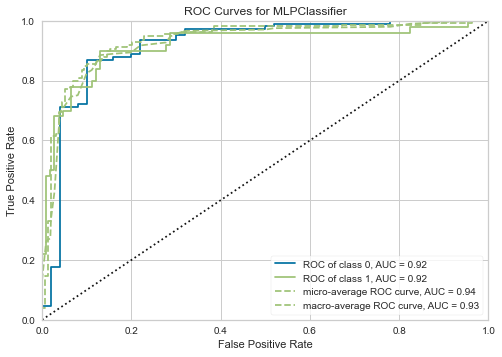

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
visualizer = ROCAUC(clf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


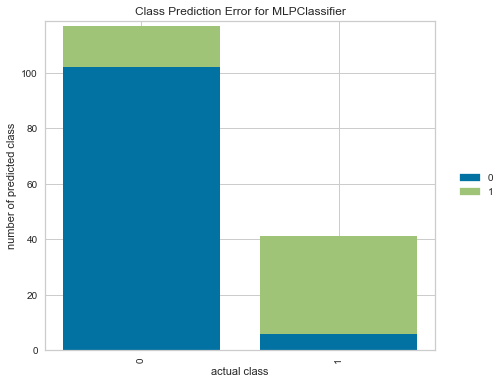

<AxesSubplot:title={'center':'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [44]:
visualizer = ClassPredictionError(
    clf, classes=[0,1]
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Decision Trees

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

#Testing the Model on test set

predictions=clf.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)


classi_report = classification_report(y_test, predictions)
print(classi_report)

0.8354430379746836
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       108
           1       0.71      0.82      0.76        50

    accuracy                           0.84       158
   macro avg       0.81      0.83      0.82       158
weighted avg       0.85      0.84      0.84       158



C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


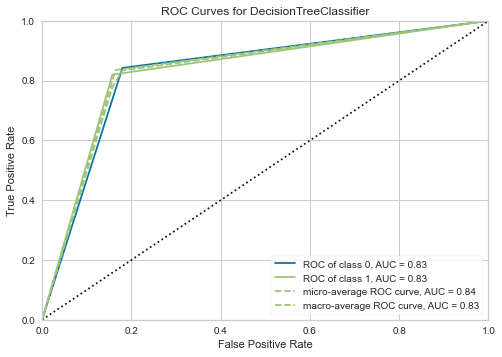

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
visualizer = ROCAUC(clf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


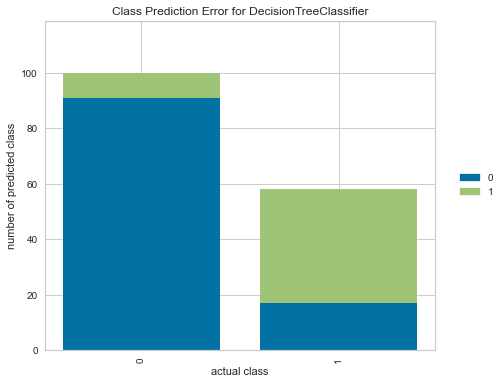

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [37]:
visualizer = ClassPredictionError(
    clf, classes=[0,1]
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [40]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

#Testing the Model on test set

predictions=clf.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)


classi_report = classification_report(y_test, predictions)
print(classi_report)

0.8607594936708861
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       108
           1       0.82      0.72      0.77        50

    accuracy                           0.86       158
   macro avg       0.85      0.82      0.83       158
weighted avg       0.86      0.86      0.86       158



C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


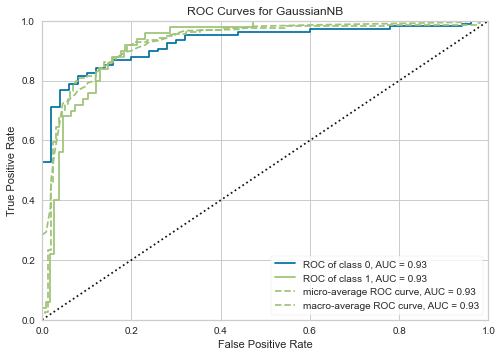

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
visualizer = ROCAUC(clf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Kaiwalya\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


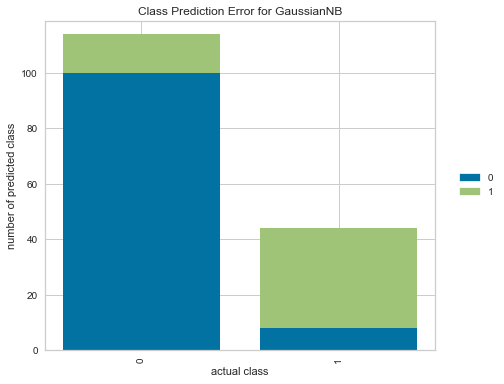

<AxesSubplot:title={'center':'Class Prediction Error for GaussianNB'}, xlabel='actual class', ylabel='number of predicted class'>

In [41]:
visualizer = ClassPredictionError(
    clf, classes=[0,1]
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()